In [8]:
import numpy as np
import matplotlib.pyplot as pp

# Automated code to execute the detection algorithm for all traces and save the resulting figures

In [11]:
def innerLoop(index, filtData):
    # The sweep length will be the minimum between 200 samples or the end of the trace
    cond = min(200, len(filtData) - index)
    for i in range(cond):
        # The sweep length will be the minimum between 200 samples or the end of the trace
        if filtdata[index + i] > 0.011:
            return True
    return False

In [13]:
preDelay = 0
postDelay = 0

## Run the code until an error is reached (it will have swept all the traces)

FileNotFoundError: ../Traces/06_11.txt not found.

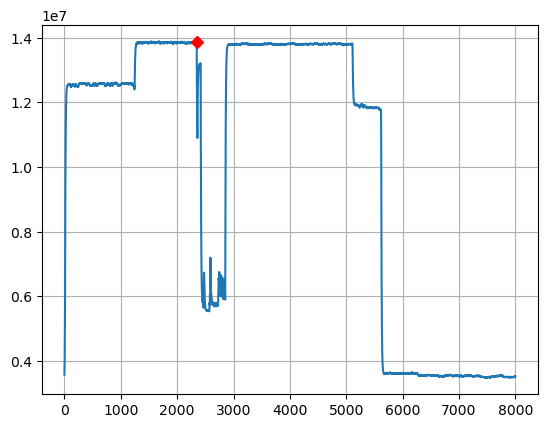

In [17]:
for i in range(28):
    postDelay = i
    postDelay0 = postDelay % 10
    postDelay1 = postDelay // 10
    for j in range(28):
        if (i + j) > 27:
            break
        preDelay = j
        preDelay0 = preDelay % 10
        preDelay1 = preDelay // 10
        NVM = 0
        done = 0
        index = 0
        
        data = np.genfromtxt("../Traces/" + str(preDelay1) + str(preDelay0) + "_" + str(postDelay1) + str(postDelay0) + ".txt", dtype='uint32', delimiter=",")
        data1 = np.delete(data, 8000)
        normdata = data1/max(data1)

        diffdata = np.zeros(7999)
        for x in range(7998):
            diffdata[x] = normdata[x+1] - normdata[x]

        filterSize = 5
        filtdata = np.zeros(7999-filterSize)
        for y in range(7999-filterSize):
            filtdata[y] = sum(diffdata[y:y+(filterSize-1)]) / filterSize

        while done != 1 and index < len(filtdata):
            for z in filtdata:
                if z < -0.011:
                    NVM = index
                    check = innerLoop(index, filtdata)
                    if check == True:
                        done = 1
                        break
                index += 1

        # Output format is "preDelay_postDelay_sampleIndex.png"
        xs = range(len(data1))
        pp.close()
        pp.grid()
        pp.plot(xs, data1)
        pp.plot(NVM, data1[NVM], '-rD')
        pp.savefig("Results/" + str(preDelay1) + str(preDelay0) + "_" + str(postDelay1) + str(postDelay0) + "_" + str(index) + ".png")
